In [1]:
import os
os.chdir('../../..')

In [2]:
import convokit

In [3]:
from convokit import Corpus, download
from convokit import HyperConvo
import numpy as np
import pickle

In [4]:
from tensorly.decomposition import parafac

In [7]:
# with open('/home/caleb/Cornell-Conversational-Analysis-Toolkit/convokit/tensors/data/hypergraph_tensor.p', 'rb') as f:

with open('convokit/tensors/data_from2_fixed/tensor.p', 'rb') as f:
    tensor = pickle.load(f)

In [8]:
# with open('hypergraph_tensor.p', 'rb') as f:
#     tensor = pickle.load(f)

In [9]:
tensor.shape

(19, 29487, 140)

In [10]:
rank_to_factors = dict()

In [11]:
start_rank = 9
end_rank = 9 + 1

In [12]:
for rank in range(start_rank, end_rank):
    print(rank)
    rank_to_factors[rank] = parafac(tensor, rank=rank)[1]

9


In [13]:
os.chdir('convokit/tensors')

In [14]:
import utils

In [15]:
utils

<module 'utils' from '/Users/calebchiam/Documents/GitHub/Cornell-Conversational-Analysis-Toolkit/convokit/tensors/utils.py'>

In [48]:
idx_to_reconstructed = dict()
components = dict()
for factors in rank_to_factors.values():
    factor1 = factors[0]
    factor2 = factors[1]
    factor3 = factors[2]
    for cidx in range(9):
        components[cidx] = [factor1[:, cidx:cidx+1], factor2[:, cidx:cidx+1], factor3[:, cidx:cidx+1]]
#         idx_to_reconstructed[cidx] = utils.reconstruct([factor1[:, :cidx], factor2[:, :cidx], factor3[:, :cidx]])
#     rank_to_reconstructed[rank] = utils.reconstruct(factors)

In [49]:
first_error = dict()
for cidx, factors in components.items():
    first_error[cidx] = np.linalg.norm(tensor-utils.reconstruct(factors))

In [50]:
first_error

{0: 14793.46061968783,
 1: 20931.716060464576,
 2: 19873.075860739707,
 3: 21142.603382956448,
 4: 19692.629491007556,
 5: 20060.440660995115,
 6: 16533.9825554209,
 7: 19147.128561919,
 8: 19982.847748290038}

## Calculate the greedy minimum error ordering

In [80]:
curr_order = []


In [53]:
import numpy as np

In [58]:
from functools import reduce

In [90]:
def get_next_component(tensor, components, curr_order):
    errors = dict()
    for (cidx, factors) in components.items():
        reconstructed = reduce(lambda x, y: x+y, [utils.reconstruct(f) for _, f in curr_order], 0)
        added_factor = utils.reconstruct(factors)
        reconstructed += added_factor
        errors[cidx] = np.linalg.norm(tensor-reconstructed)
    print(errors)
    min_error_cpt = sorted(list(errors.items()), key=lambda x: x[1])[0][0]
    curr_order.append((min_error_cpt, components[min_error_cpt]))
    del components[min_error_cpt]
    return min_error_cpt, curr_order

In [92]:
curr_order = []
components_copy = components.copy()
while len(components_copy) > 0:
    print(len(components_copy))
    _, curr_order = get_next_component(tensor, components_copy, curr_order)

9
{0: 14793.46061968783, 1: 20931.716060464576, 2: 19873.075860739707, 3: 21142.603382956448, 4: 19692.629491007556, 5: 20060.440660995115, 6: 16533.9825554209, 7: 19147.128561919, 8: 19982.847748290038}
8
{1: 14702.316628247214, 2: 14366.697314881232, 3: 15818.619672783063, 4: 14464.296462704608, 5: 15143.40152936504, 6: 12586.38093817387, 7: 13780.89300501841, 8: 14772.52909884815}
7
{1: 11807.646926378538, 2: 12046.140123358311, 3: 13345.386343781354, 4: 12232.296426005536, 5: 12589.164054766115, 7: 12103.288112929436, 8: 12717.564087274925}
6
{2: 11202.609732688965, 3: 11759.495680572501, 4: 11430.039570396453, 5: 11074.524985616734, 7: 11268.175361330806, 8: 11712.084384592012}
5
{2: 10240.924697905362, 3: 10487.21071743224, 4: 10737.364695381168, 7: 10150.767138825207, 8: 10998.482540799865}
4
{2: 9229.312412987825, 3: 9239.686339941774, 4: 9745.563475557874, 8: 10175.013748514995}
3
{3: 8209.852624026707, 4: 8757.386703024033, 8: 9273.877008897305}
2
{4: 7711.962648135293, 8: 71

In [93]:
[idx for (idx, _) in curr_order]

[0, 6, 1, 5, 7, 2, 3, 8, 4]

In [76]:
get_next_component(tensor, component_items, curr_order)

0

In [ ]:
for i in range()

In [41]:
idx_to_error = dict()
for idx, M in idx_to_reconstructed.items():
    print(idx)
    print(M.shape)
    print(np.linalg.norm(M))
#     idx_to_error[idx] = np.linalg.norm(tensor - M)

1
(19, 29487, 140)
10623.1502354438
2
(19, 29487, 140)
11942.843327291142
3
(19, 29487, 140)
12647.308447555535
4
(19, 29487, 140)
12862.562510909314
5
(19, 29487, 140)
13629.705060209386
6
(19, 29487, 140)
14408.30386349302
7
(19, 29487, 140)
17903.59400606617
8
(19, 29487, 140)
18947.592028948406
9
(19, 29487, 140)
19156.029151150073


In [39]:
idx_to_error

{1: 14793.46061968783,
 2: 14702.316628247214,
 3: 14251.282784457373,
 4: 14613.415609150643,
 5: 14285.280975851776,
 6: 13555.267730803329,
 7: 9213.111133264845,
 8: 7711.962648135293,
 9: 6348.4610508127425}

In [19]:
import matplotlib.pyplot as plt

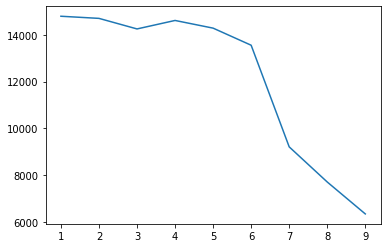

In [40]:
plt.plot(list(idx_to_error.keys()), list(idx_to_error.values()))

We'll go with 9 components for now.

In [26]:
os.listdir()

['__init__.py', 'data', 'demo', 'utils.py', '__pycache__']

In [12]:
with open('data_long/rank_to_factors.p', 'wb') as f:
    pickle.dump(rank_to_factors, f)

In [ ]:
{1: 3819.265576516634,
 2: 2844.773417177397,
 3: 2576.5195453161737,
 4: 2357.5843602190625,
 5: 2179.368911193231,
 6: 2053.847295539327,
 7: 1903.4653298649869}

## Testing invariance to shuffling

In [20]:
tensor.shape

(9, 10000, 164)

Shuffle the time dimension.

In [22]:
tensor_time_shuffled = tensor.copy()
np.random.shuffle(tensor_time_shuffled)

In [25]:
factors = parafac(tensor_time_shuffled, rank=rank)[1]

In [26]:
reconstructed = utils.reconstruct(factors)
error = np.linalg.norm(tensor_time_shuffled - reconstructed)

In [27]:
error # same error as before!

1762.374856664664

In [28]:
with open('data/rank_to_factors_time_shuffled.p', 'wb') as f:
    pickle.dump({9: factors}, f)

Shuffle the discussion thread order.

In [61]:
tensor_thread_shuffled = tensor.copy()

In [62]:
shuffle_idx = list(range(10000))

In [63]:
np.random.shuffle(shuffle_idx)

In [65]:
for i in range(tensor_thread_shuffled.shape[0]):
    tensor_thread_shuffled[i] = tensor_thread_shuffled[i][shuffle_idx]

In [67]:
factors = parafac(tensor_thread_shuffled, rank=rank)[1]

In [70]:
reconstructed = utils.reconstruct(factors)
error = np.linalg.norm(tensor_thread_shuffled - reconstructed)

In [71]:
error # same error as before!

1762.3748566646532

In [73]:
with open('data/rank_to_factors_thread_shuffled.p', 'wb') as f:
    pickle.dump({9: factors}, f)